# NEURAL MACHINE TRANSLATION BY JOINTLY LEARNING TO ALIGN AND TRANSLATE (2016)

출처: [https://arxiv.org/pdf/1409.0473.pdf](https://arxiv.org/pdf/1409.0473.pdf)

## ABSTRACT

Neural machine translation은 최근에 제안된 machine translation 접근 방식입니다. 기존의 statistical machine translation과 달리 neural machine translation은 번역 성능을 극대화하기 위해 함께 튜닝할 수 있는 단일 신경망을 구축하는 것을 목표로 합니다. neural machine translation을 위해 최근에 제안된 모델은 보통 인코더-디코더 구조를 가지며, 디코더가 번역을 생성하는 fixed-length vector로 source sentence를 인코딩합니다. 이 논문에서는 fixed-length vector의 사용이 이러한 기본 인코더-디코더 아키텍처의 성능을 향상시키는데 bottleneck이 있다고 추측하고 모델이 다음과 같은 source sentence의 일부를 자동으로 검색할 수 있도록 하여 이를 확장할 것을 제안합니다. 이 새로운 접근 방식으로 English-to-French 번역 작업에서 기존의 state-of-the-art phrase-based 시스템과 비슷한 번역 performance을 달성합니다. 게다가, 정성적 분석은 모델에 의해 발견된 alignments가 여기서의 직관과 잘 일치한다는 것을 보여줍니다.

## 1 INTRODUCTION

Neural machine translation은 machine translation에 대한 새로운 접근 방식입니다. 개별적으로 조정되는 많은 작은 하위 구성요소로 구성된 기존의 phrase-based translation 시스템과 달리 neural machine translation은 문장을 읽고 올바른 번역을 출력하는 하나의 대규모 신경망을 구축하고 훈련하려고 시도합니다.

제안된 neural machine translation 모델의 대부분은 각 언어에 대한 인코더와 디코더가 있는 인코더-디코더에 속하거나 각 문장에 언어별 인코더가 적용되어 출력이 비교됩니다. 인코더 신경망은 source sentence을 읽고 fixed-length vector로 인코딩합니다. 그런 다음 디코더는 인코딩된 벡터에서 번역을 출력합니다. language pair에 대한 인코더와 디코더로 구성된 전체 인코더-디코더 시스템은 source sentence가 주어지면 올바른 번역의 확률을 최대화하도록 함께 훈련됩니다.

이 인코더-디코더 접근 방식의 잠재적인 문제점은 신경망이 source sentence에 필요한 모든 정보를 fixed-length vector에 담아야 한다는 것입니다. 이로 인해 신경망이 긴 문장, 특히 훈련 corpus의 문장보다 긴 문장에 대처하기 어려울 수 있습니다. Cho et al. (2014b)는 실제로 기본 인코더-디코더의 성능이 입력 문장의 길이가 증가함에 따라 급격히 저하됨을 보여주었습니다.

이 문제를 해결하기 위해 함께 align하고 translate하는 방법을 학습하는 인코더-디코더 모델을 확장하는 방법을 소개합니다. 제안된 모델은 번역에서 단어를 생성할 때마다 가장 관련성이 높은 정보가 집중된 souce sentence의 위치 집합을 검색합니다. 그런 다음 모델은 이러한 source 위치 및 이전에 생성된 모든 target words와 관련된 context vectors를 기반으로 target word를 예측합니다.

이러한 접근 방식이 기본 인코더-디코더와 구별되는 가장 중요한 특징은 전체 입력 문장을 단일 fixed-length vector로 인코딩하지 않는다는 것입니다. 대신, 입력 문장을 일련의 벡터로 인코딩하고 번역을 디코딩하는 동안 적응적으로 이러한 벡터의 하위 집합을 선택합니다. 이렇게 하면 길이에 상관없이 source sentence의 모든 정보를 fixed-length vector로 압축해야 하는 neural translation model의 문제에서 자유롭게 해줍니다. 이를 통해 모델이 긴 문장에 더 잘 대처할 수 있음을 보여줍니다.

## 2 BACKGROUND: NEURAL MACHINE TRANSLATION

확률론적 관점에서 번역은 주어진 source sentence $x$, 즉 $\arg \max _{\mathbf{y}} p(\mathbf{y\,|\,x})$에서 $y$의 조건부 확률을 최대화하는 target sentence $y$를 찾는 것과 같습니다. neural machine translation에서 병렬 훈련 corpus를 사용하여 sentence pairs의 조건부 확률을 최대화하기 위해 parameterized 모델을 훈련시킵니다. 번역 모델에 의해 조건부 분포가 학습되면, soruce sentence가 주어지면 조건부 확률을 최대화하는 문장을 검색하여 해당 번역을 생성할 수 있습니다.

### 2.1 RNN ENCODER–DECODER
인코더-디코더 프레임워크에서 인코더는 입력 문장, 벡터 $\mathbf{x}=\left(x_{1}, \cdots, x_{T_{x}}\right)$의 시퀀스를 벡터 $c$로 읽습니다.

가장 일반적인 접근 방식은 $h_{t}=f\left(x_{t}, h_{t-1}\right)$ 혹은 $c=q\left(\left\{h_{1}, \cdots, h_{T_{x}}\right\}\right)$와 같은 RNN을 사용하는 것입니다.

$h_{t} \in \mathbb{R}^{n}$은 t 시점에서의 hidden state, $c$는 hidden states를 통해 생성된 벡터, $f$와 $q$는 어떤 nonlinear functions입니다.

디코더는 context vector $c$, 이전에 예측했던 단어 $\left\{y_{1}, \cdots, y_{t^{\prime}-1}\right\}$이 주어지면 다음 단어 $y_t$를 예측하도록 훈련됩니다. 따라서, 디코더는 다음과 같이 $y$의 확률을 정의합니다:

$$p(\mathbf{y})=\prod_{t=1}^{T} p\left(y_{t} \mid\left\{y_{1}, \cdots, y_{t-1}\right\}, c\right)$$

$\mathbf{y}=\left(y_{1}, \cdots, y_{T_{y}}\right)$에서 RNN을 사용하면 각각의 조건부 확률은 다음과 같이 모델링 됩니다:

$$p\left(y_{t} \mid\left\{y_{1}, \cdots, y_{t-1}\right\}, c\right)=g\left(y_{t-1}, s_{t}, c\right)$$

$g$는 $y_t$의 확률을 산추하는 nonlinear, potentially multi-layered 함수, $s_t$는 RNN의 hidden state

## 3 LEARNING TO ALIGN AND TRANSLATE

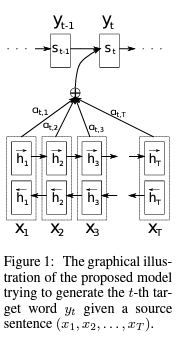

여기서 제안하는 새로운 아키텍처는 인코더인 양방향 RNN과 번역을 디코딩하는 동안 source sentence을 통해 searching을 모방하는 디코더로 구성됩니다.

### 3.1 DECODER: GENERAL DESCRIPTION
새로운 모델 아키텍처에서 각각의 조건부 확률을 다음과 같이 정의합니다:

$$p\left(y_{i} \mid y_{1}, \ldots, y_{i-1}, \mathbf{x}\right)=g\left(y_{i-1}, s_{i}, c_{i}\right)$$

$s_i$는 시점 $i$에서의 RNN hidden state입니다. 다음과 같이 계산됩니다:

$$s_{i}=f\left(s_{i-1}, y_{i-1}, c_{i}\right)$$

여기서는 기존의 인코더-디코더 접근방식과 다르게 각각의 target word $y_i$에 대한 context vector $c_i$에 따라 확률이 결정됩니다.

context vector $c_i$는 인코더가 input sentence를 매핑하는 $annotations \,\, \left(h_{1}, \cdots, h_{T_{x}}\right)$ 시퀀스에 따라 달라집니다. 각각의 annotation $h_i$는 input sentence의 i번째 단어 주변 부분을 강하게 포커싱한 전체 input sentence의 정보를 담고 있습니다.

context vector $c_i$는 annotations $h_i$를 weighted sum을 해 다음과 같이 계산합니다:

$$c_{i}=\sum_{j=1}^{T_{x}} \alpha_{i j} h_{j}$$

각각의 annotation $h_j$의 weight $\alpha_{i j}$는 다음과 같이 계산됩니다:

$$\alpha_{i j}=\frac{\exp \left(e_{i j}\right)}{\sum_{k=1}^{T_{w}} \exp \left(e_{i k}\right)}$$

$e_{i j}=a\left(s_{i-1}, h_{j}\right)$는 position $j$ 주위의의 input과 position $i$에서의 output이 얼마나 잘 매칭되는지 점수를 매긴 $alignment \, model$입니다. 점수는 RNN hidden state $s_{i-1}$와 input sentence의 $j$번째 annotation $h_j$를 기반으로 측정됩니다.

확률 $α_{ij}$ 또는 관련 energy $e_{ij}$는 다음 state $s_i$를 결정하고 $y_i$를 생성할 때 이전 hidden state $s_{i−1}$에 대한 주석 $h_j$의 중요성을 반영합니다.

직관적으로 디코더에서는 attention mechanism을 수행하는 것을 알 수 있습니다. 디코더는 집충해야 할 source sentence의 부분을 결정합니다. 이렇게 디코더가 attention 메커니즘을 가짐으로써, 인코더가 souce sentence의 모든 정보를 하나의 fixed-length vector에 담는 부담을 덜 수 있게 됐습니다.

### 3.2 ENCODER: BIDIRECTIONAL RNN FOR ANNOTATING SEQUENCES
여기서는 Bidirectional RNN을 사용합니다. 이를 통해, forward hidden state $\vec{h}_{j}$와 backward hidden state $\overleftarrow{h} _{j}$ concatenate하여 각 단어 $x_j$에 대한 annotation을 얻습니다. 

$$h_{j}=\left[\vec{h}_{j}^{\top} ; \overleftarrow{h}_{j}^{\top}\right]^{\top}$$

RNN은 최근 input을 더 잘 표현하는 경향이 있기 때문에 annotation $h_j$는 $x_j$ 주위의 단어에 더 포커싱합니다.

이 annotations는 디코더와 나중에 context vector를 계산하는 alignment model에 사용됩니다.

(위의 Figure 1을 확인해주세요)

## 5 RESULTS 

### 5.1 QUANTITATIVE RESULTS

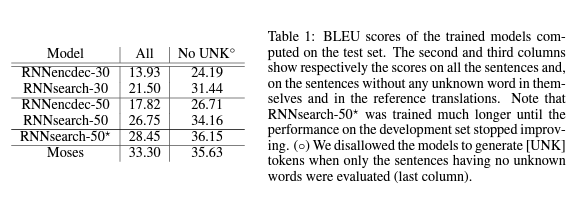

위의 Table 1을 보면 이 논문에서 제안한 RNN search 모델이 기존의 RNN 인코더-디코더 모델보다 뛰어난 성능을 보여줍니다. 더 중요한건 unknown words를 제외한 문장을 고려했을 때, Moses 모델만큼 성능이 뛰어나다는 것입니다.

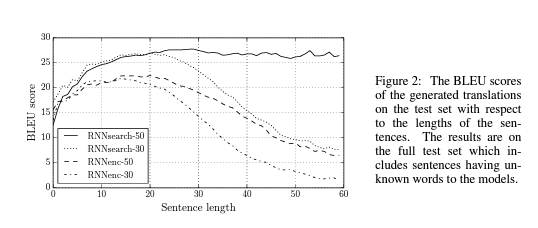

또한, Figure 2에서 볼 수 있다시피 이 논문에서 제안한 모델은 기존의 인코더-디코더 모델에서 보다 긴 문장에 robust합니다.

## 7 CONCLUSION
인코더-디코더 접근이라고 하는 neural machine translation에 대한 기존 접근 방식은 전체 입력 문장을 번역이 디코딩될 fixed-length vector로 인코딩합니다. 여기서는 최근 연구를 기반으로 fixed-length context vector를 사용하는 것이 긴 문장을 번역하는 데 문제가 있다고 추측했습니다.

이 논문에서는 이 문제를 해결하는 새로운 아키텍처를 제안했습니다. 각 target word를 생성할 때 모델이 입력 단어 집합 또는 인코더에 의해 계산된 annotations을 검색하도록 하여 기본 인코더-디코더를 확장했습니다. 이렇게 하면 모델이 전체 소스 문장을 fixed-length vector로 인코딩할 필요가 없으며 모델이 다음 target word 생성과 관련된 정보에만 집중할 수 있습니다. 이것은 neural machine translation 시스템이 긴 문장에서 좋은 결과를 내는데 긍정적인 영향을 미칩니다. 전통적인 neural translation 시스템과 달리 alignment 메커니즘을 포함한 번역 시스템의 모든 부분은 올바른 번역을 생성할 수 있도록 함께 훈련됩니다.

English-to-French 번역 작업에 대해 제안된 모델인 RNNsearch를 테스트했습니다. experiment는 제안된 RNNsearch가 문장 길이에 관계없이 기존 인코더-디코더 모델(RNNencdec)보다 훨씬 뛰어나고 source sentence의 길이에 상관없이 더 robust하다는 것을 보여주었습니다. RNNsearch에 의해 생성된 alignment를 조사한 qualiatative analysis에서는 모델이 올바른 번역을 생성할 때 source sentence의 관련 단어 또는 annotation과 각 target word를 올바르게 align할 수 있다는 결론을 내릴 수 있었습니다.

아마도 더 중요한 것은 제안된 접근 방식이 기존의 phrase-based statistical machine translationi에 필적하는 번역 성능을 달성했다는 점입니다. 제안된 아키텍처는 올해에서야 제안되었다는 점을 고려하면 놀라운 결과입니다.